<a href="https://colab.research.google.com/github/WLAraujo/min_dados_ufabc/blob/main/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

## 0 - Instalação do SweetViz

In [2]:
!pip install sweetviz
import warnings
warnings.simplefilter(action="ignore")

     |████████████████████████████████| 15.1 MB 4.4 MB/s 


## 1 - Importação das Dependências

In [3]:
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm

## 2 Exploração de Dados Manual

In [8]:
# Importação do Dataframe
gorjeta = pd.read_csv("https://raw.githubusercontent.com/schloerke/cranvasOLD/master/files/data/tips.csv",index_col=0)

In [9]:
# 5 primeiras linhas
gorjeta.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
# 10 primeiras linhas
gorjeta.head(10)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4
7,8.77,2.00,Male,No,Sun,Dinner,2
8,26.88,3.12,Male,No,Sun,Dinner,4
9,15.04,1.96,Male,No,Sun,Dinner,2
10,14.78,3.23,Male,No,Sun,Dinner,2


In [11]:
# 5 últimas linhas
gorjeta.tail()

,total_bill,tip,sex,smoker,day,time,size
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2
244,18.78,3.00,Female,No,Thur,Dinner,2


In [12]:
# 7 últimas linhas
gorjeta.tail(7)

,total_bill,tip,sex,smoker,day,time,size
238,32.83,1.17,Male,Yes,Sat,Dinner,2
239,35.83,4.67,Female,No,Sat,Dinner,3
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2
244,18.78,3.00,Female,No,Thur,Dinner,2


In [13]:
# Amostra aleatória de 10 linhas
gorjeta.sample(10) 

,total_bill,tip,sex,smoker,day,time,size
145,16.43,2.30,Female,No,Thur,Lunch,2
176,32.90,3.11,Male,Yes,Sun,Dinner,2
193,28.44,2.56,Male,Yes,Thur,Lunch,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
233,11.61,3.39,Male,No,Sat,Dinner,2
88,18.28,4.00,Male,No,Thur,Lunch,2
153,17.26,2.74,Male,No,Sun,Dinner,3
114,23.95,2.55,Male,No,Sun,Dinner,2
198,43.11,5.00,Female,Yes,Thur,Lunch,4
74,25.28,5.00,Female,Yes,Sat,Dinner,2


In [15]:
# Informações técnicas das colunas
gorjeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [16]:
# Descrição estatística do dataset
gorjeta.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


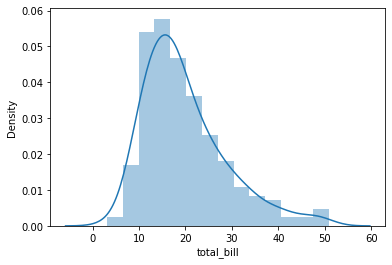

In [17]:
# Densidade de probabilidade do atributo total_bill
conta = gorjeta['total_bill']
sns.distplot(conta)

In [22]:
# Calculando as medidas de tendência central
media=conta.mean()
mediana=conta.median()
moda=conta.mode()

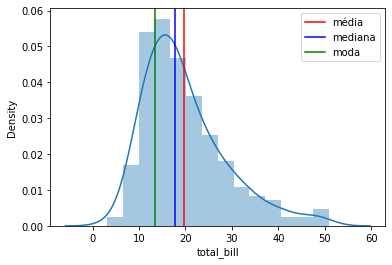

In [23]:
# Apresentando as medidas de tendência central
sns.distplot(conta)
plt.axvline(media,color='r',label='média')
plt.axvline(mediana,color='b',label='mediana')
plt.axvline(moda[0],color='g',label='moda')
plt.legend()

In [25]:
# Calculando a assimetria (skewness) que deve ser maior que um (calda à direita)
conta.skew() 

1.1332130376158205

Vamos apresentar duas distribuições, uma normal e uma não paramétrica (não segue a normal) que é a que já estamos vendo, e comparar a estimativa de densidade de ambas.

In [26]:
# Definindo o range e os buckets
x = np.arange(-5, 60, 0.1)

In [28]:
# Média e variancia da distribuição de contas
media = conta.mean()
variancia = conta.std()

In [29]:
# Cálculo da normal para os parâmetros definidos
y = norm.pdf(x, media, variancia)

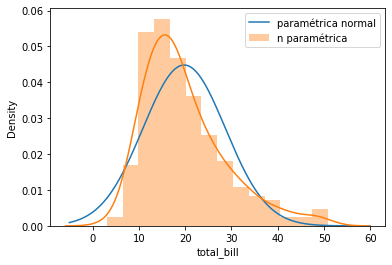

In [30]:
# Plotando a comparação
plt.plot(x,y,label='paramétrica normal')
sns.distplot(conta,label='n paramétrica')
plt.legend()
plt.show()

Vamos visualizar a distribuição por boxplot.

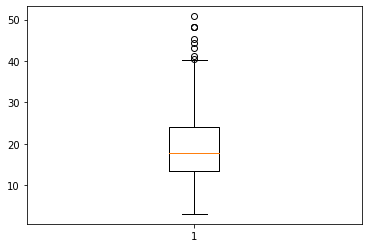

In [31]:
# Boxplot das contas
plt.boxplot(conta)
plt.show()

In [32]:
# Definindo em variáveis os valores importantes do boxplot do nosso dataset
Q1 = conta.quantile(q=0.25)
Q2 = conta.quantile(q=0.5)
Q3 = conta.quantile(q=0.75)
IQR = Q3 - Q1
LI = max(Q1 - 1.5 * IQR, conta.min()) 
LU = min(Q3 + 1.5 * IQR, conta.max())

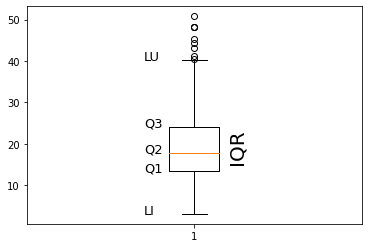

In [33]:
# Vamos incrementar nosso boxplot com algumas notações interessantes
plt.boxplot(conta)
plt.text(0.85,Q1,s='Q1',size=13)
plt.text(0.85,Q2,s='Q2',size=13)
plt.text(0.85,Q3,s='Q3',size=13)
plt.text(0.85,LI,s='LI',size=13)
plt.text(0.85,LU,s='LU',size=13)
plt.text(1.1,16,s='IQR',rotation=90,size=20)
plt.show()

## 3 - Exploração de Dados Automatizada

Para um grande conjunto de variáveis pode ser difícil e muito trabalhoso fazer o processo que fizemos à mão.
Existem diversos pacotes e ferramentas que geram relatórios padronizados sobre um conjunto de dados visando a análise exploratória dos mesmos.
Um desses pacotes é o sweetviz.

                                             |          | [  0%]   00:00 -> (? left)


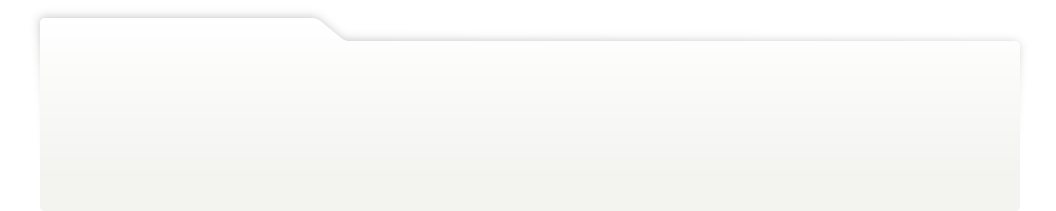
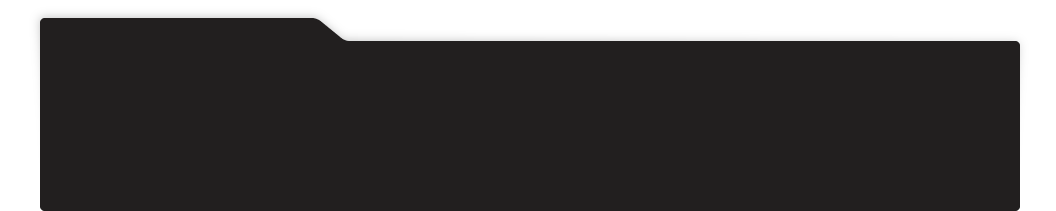
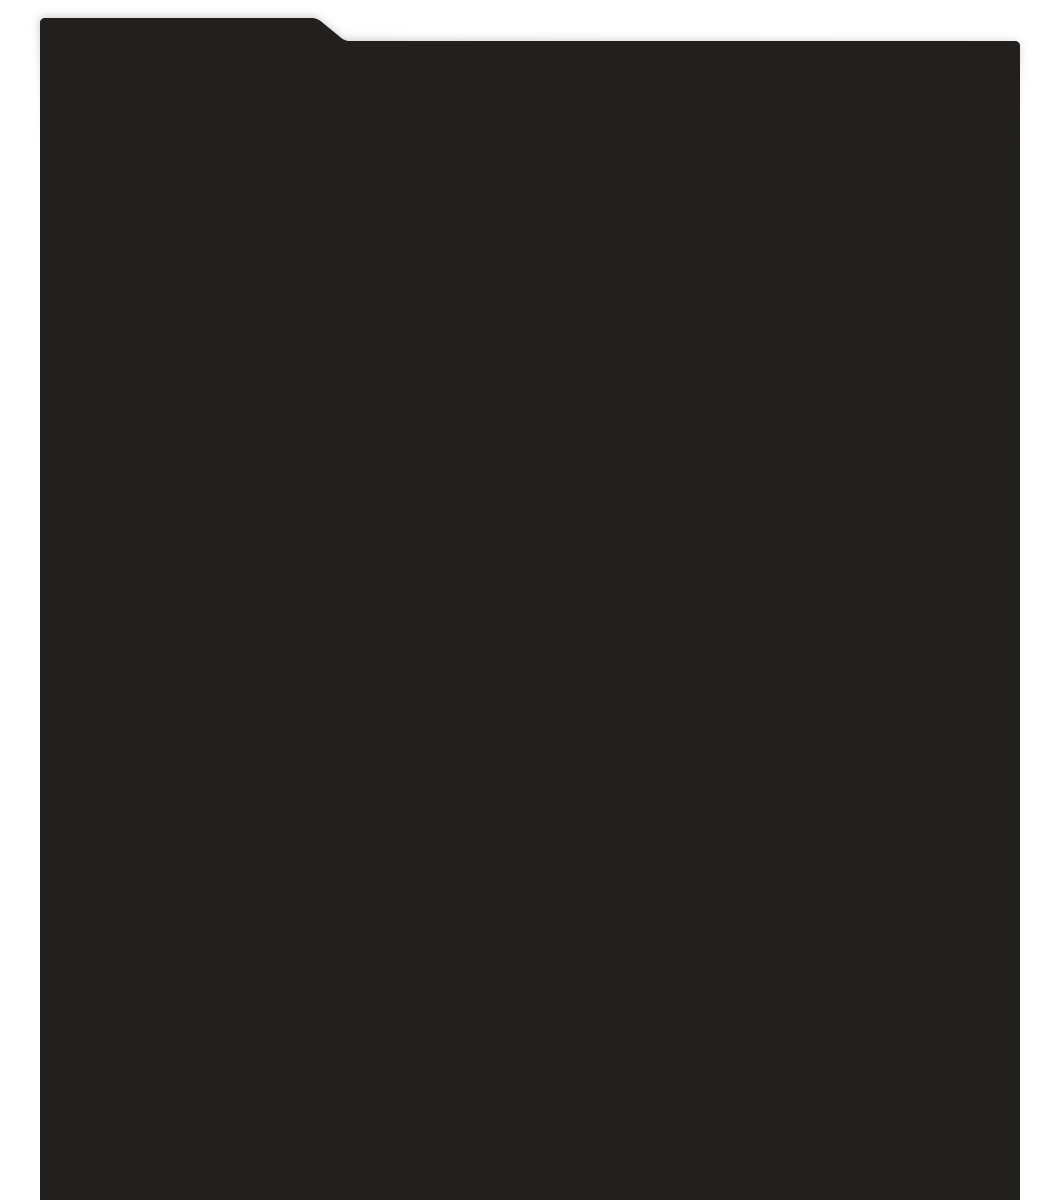
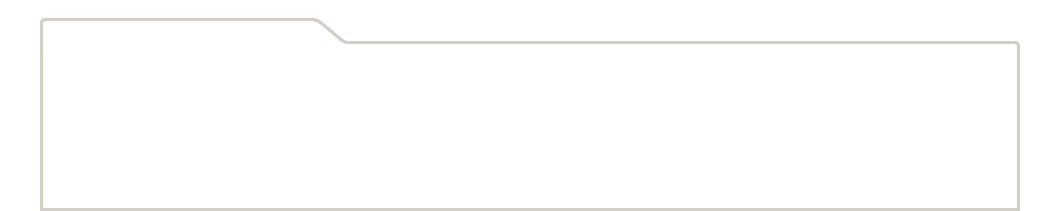
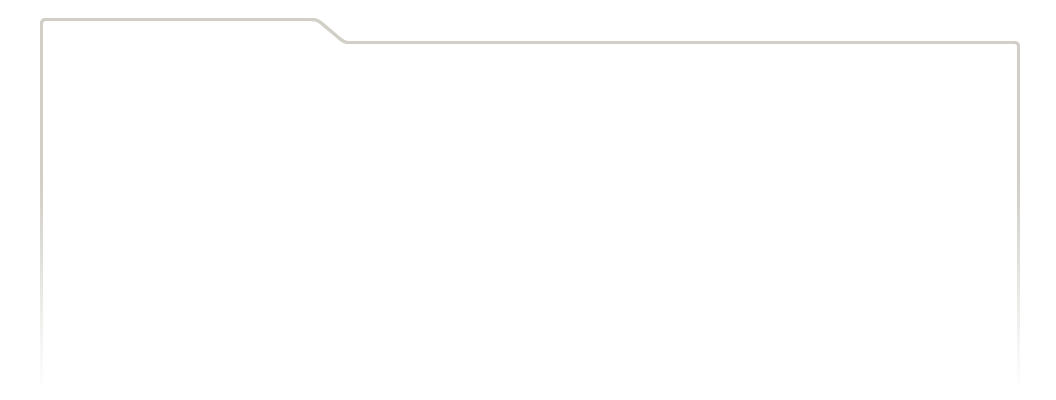
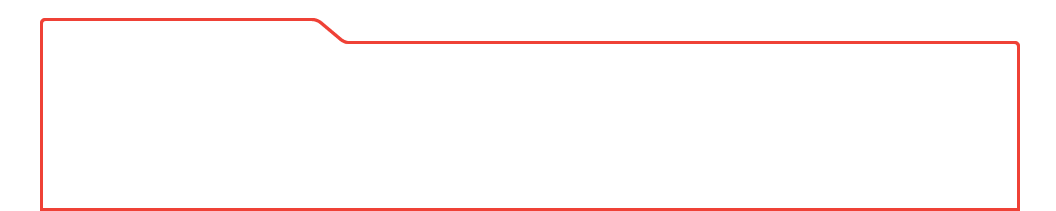
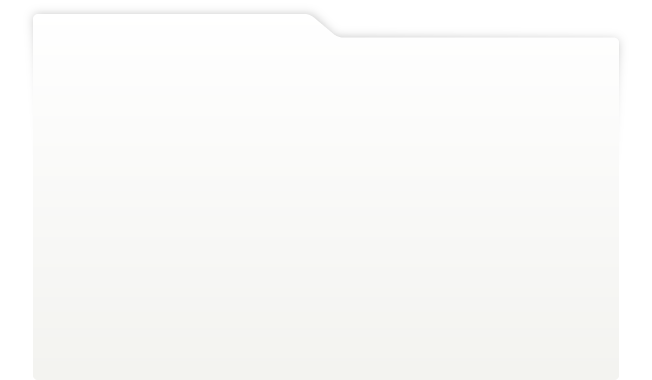
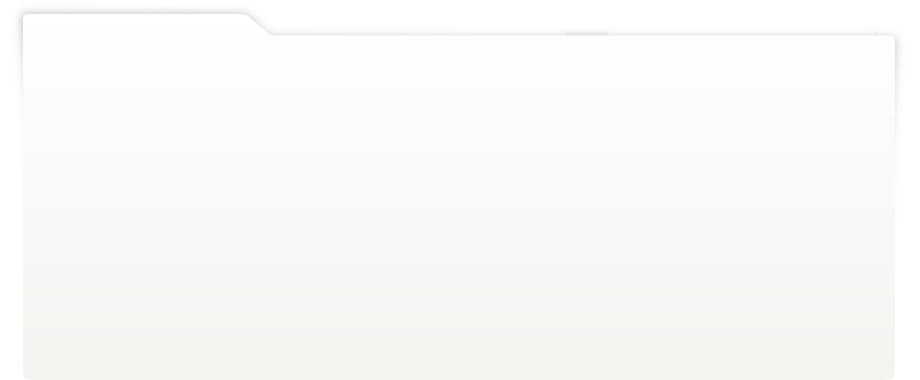
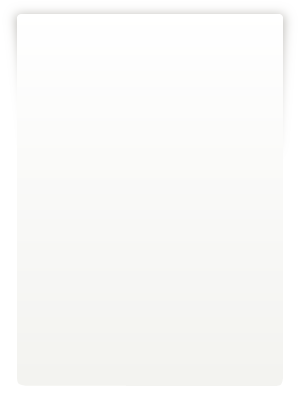
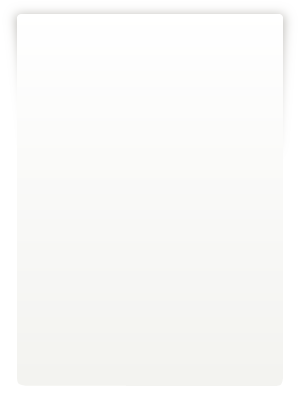
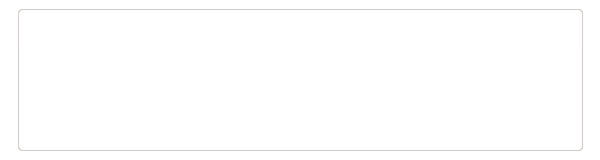
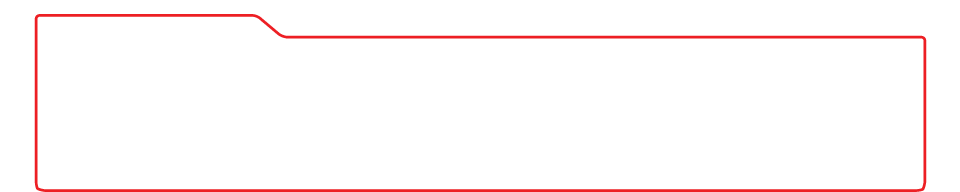
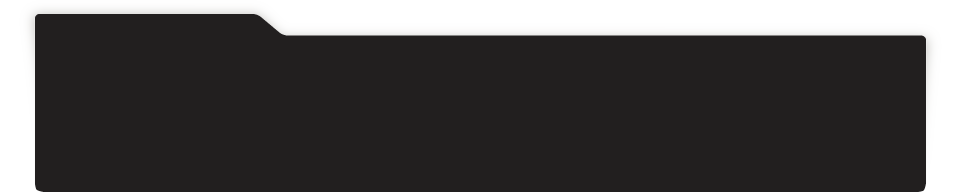
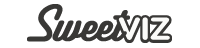
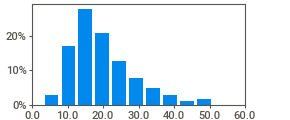
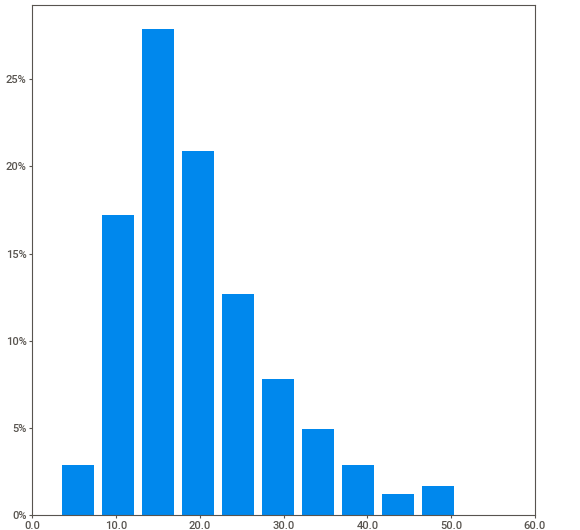
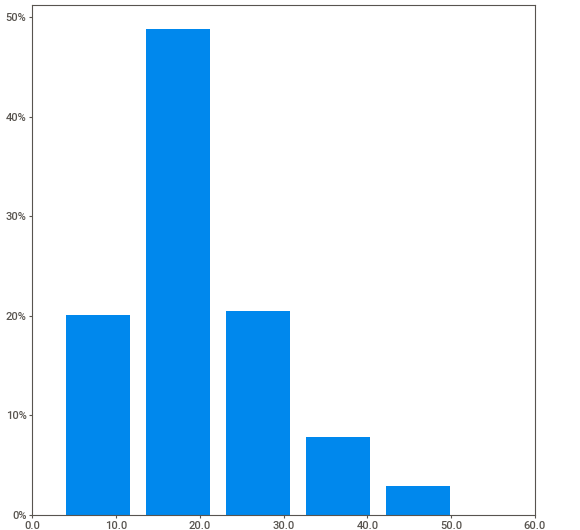
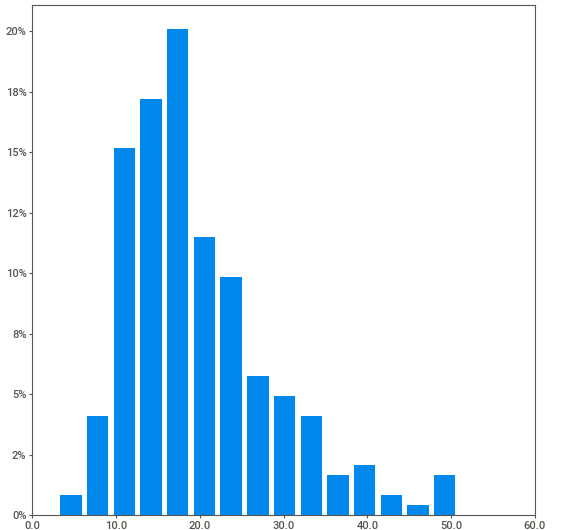
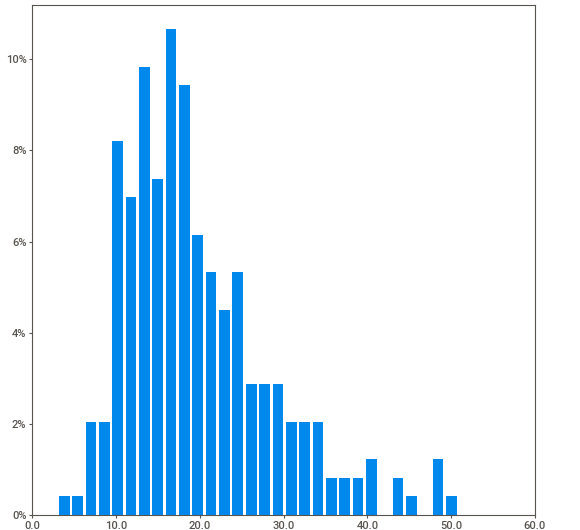
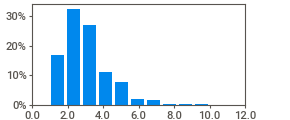
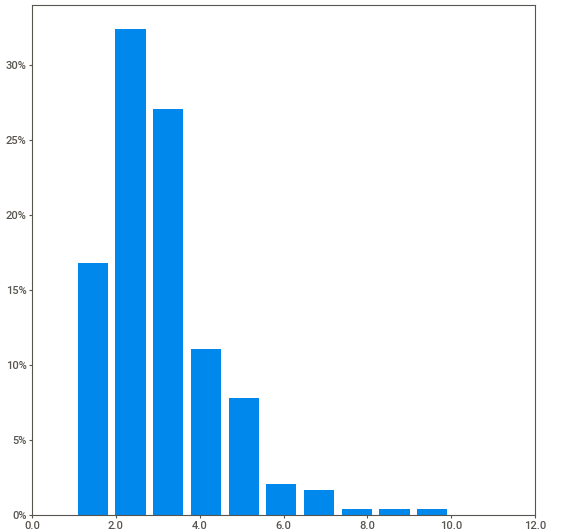
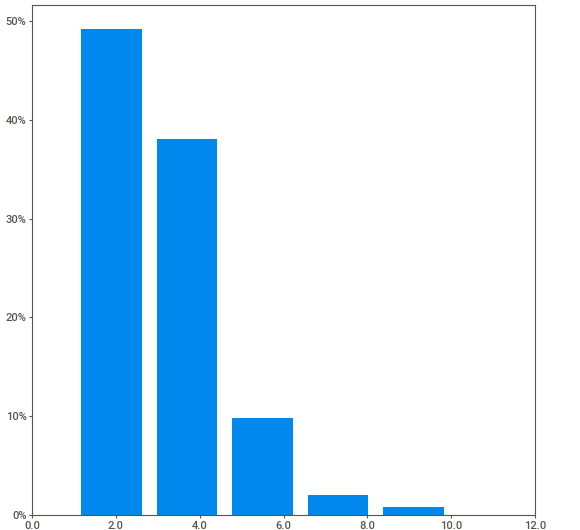
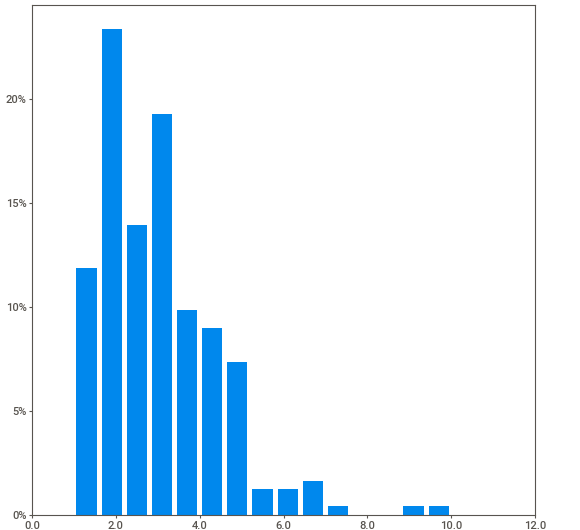
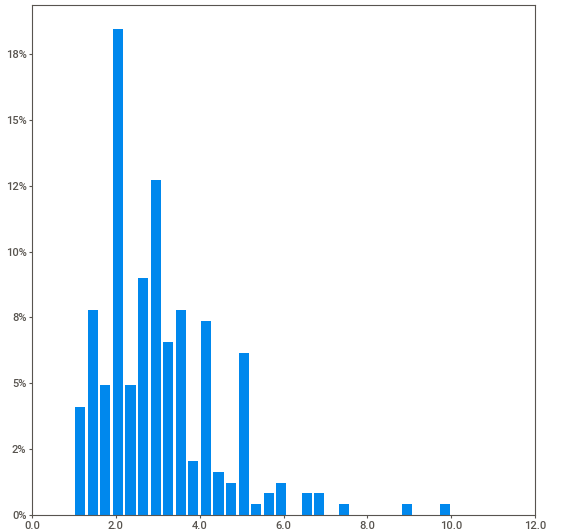
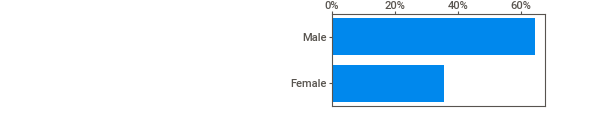
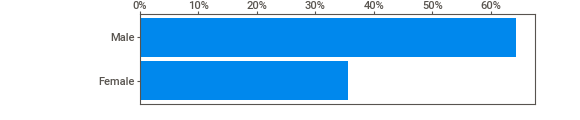
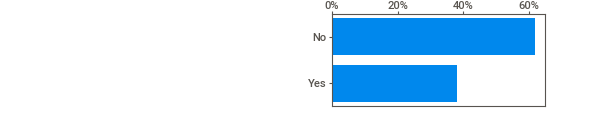
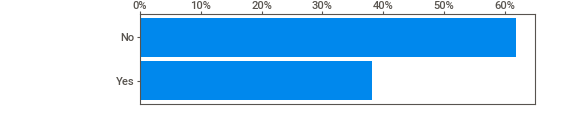
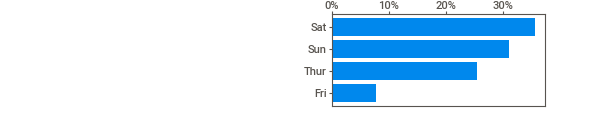
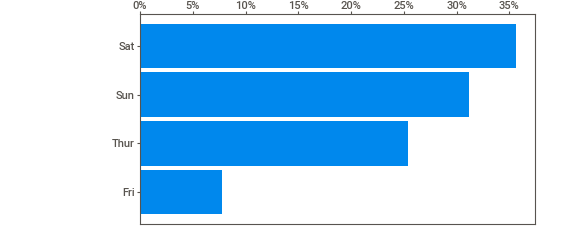
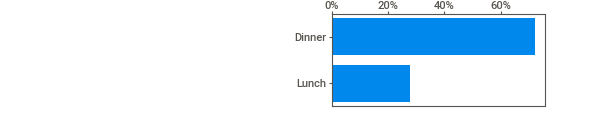
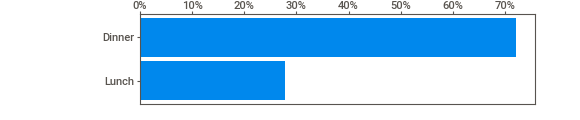
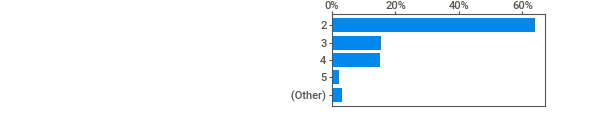
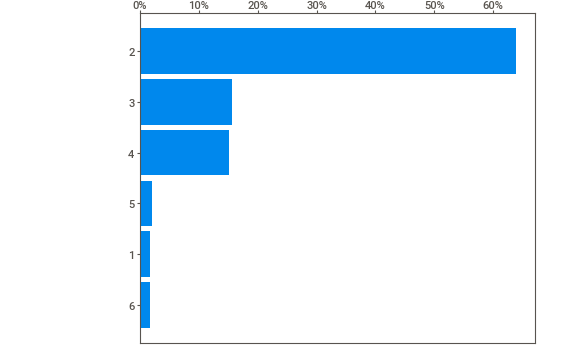
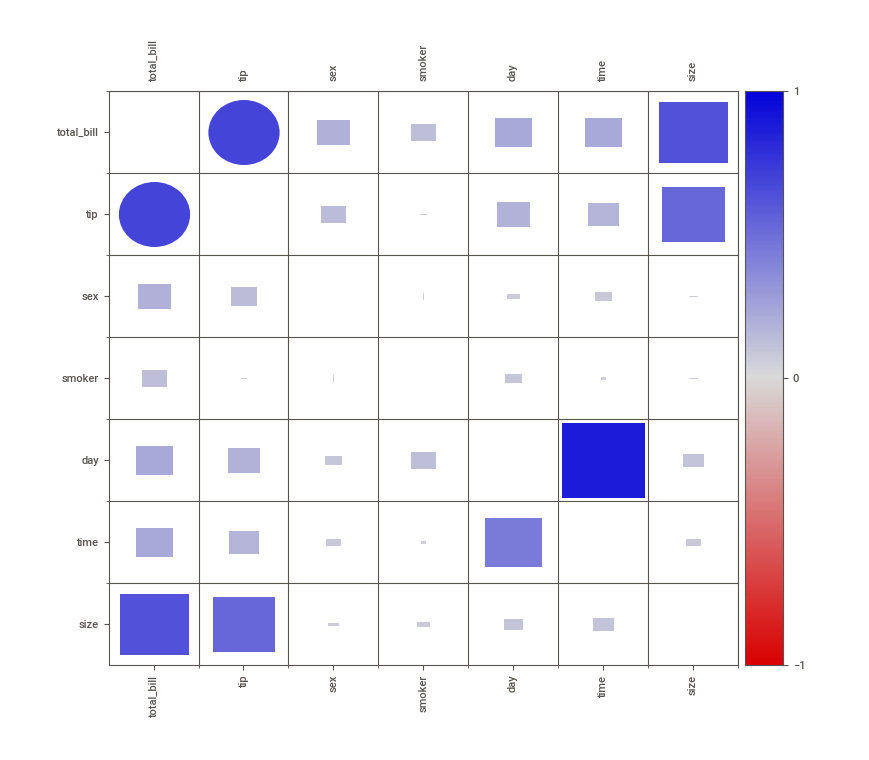
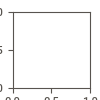

In [34]:
report = sv.analyze(gorjeta)
report.show_notebook() 

Podemos ainda comparar diferentes recortes da base. Vamos comparar os fumantes e não fumantes.

                                             |          | [  0%]   00:00 -> (? left)


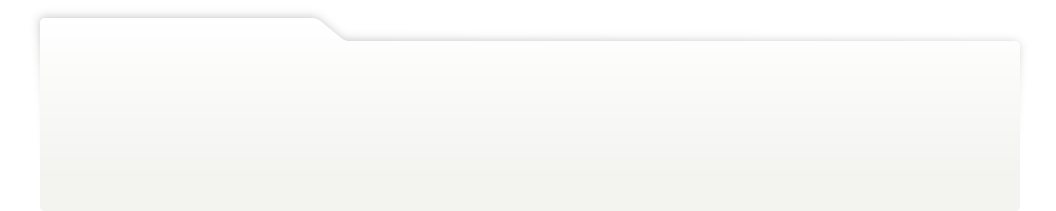
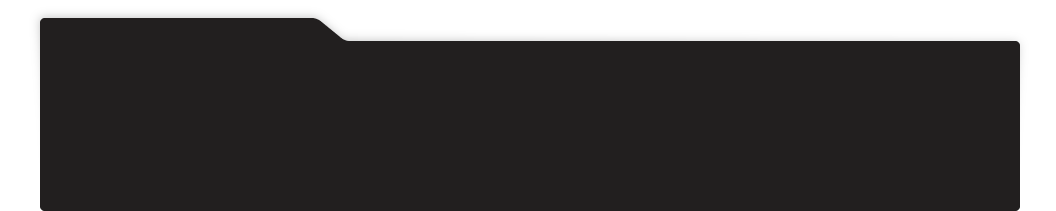
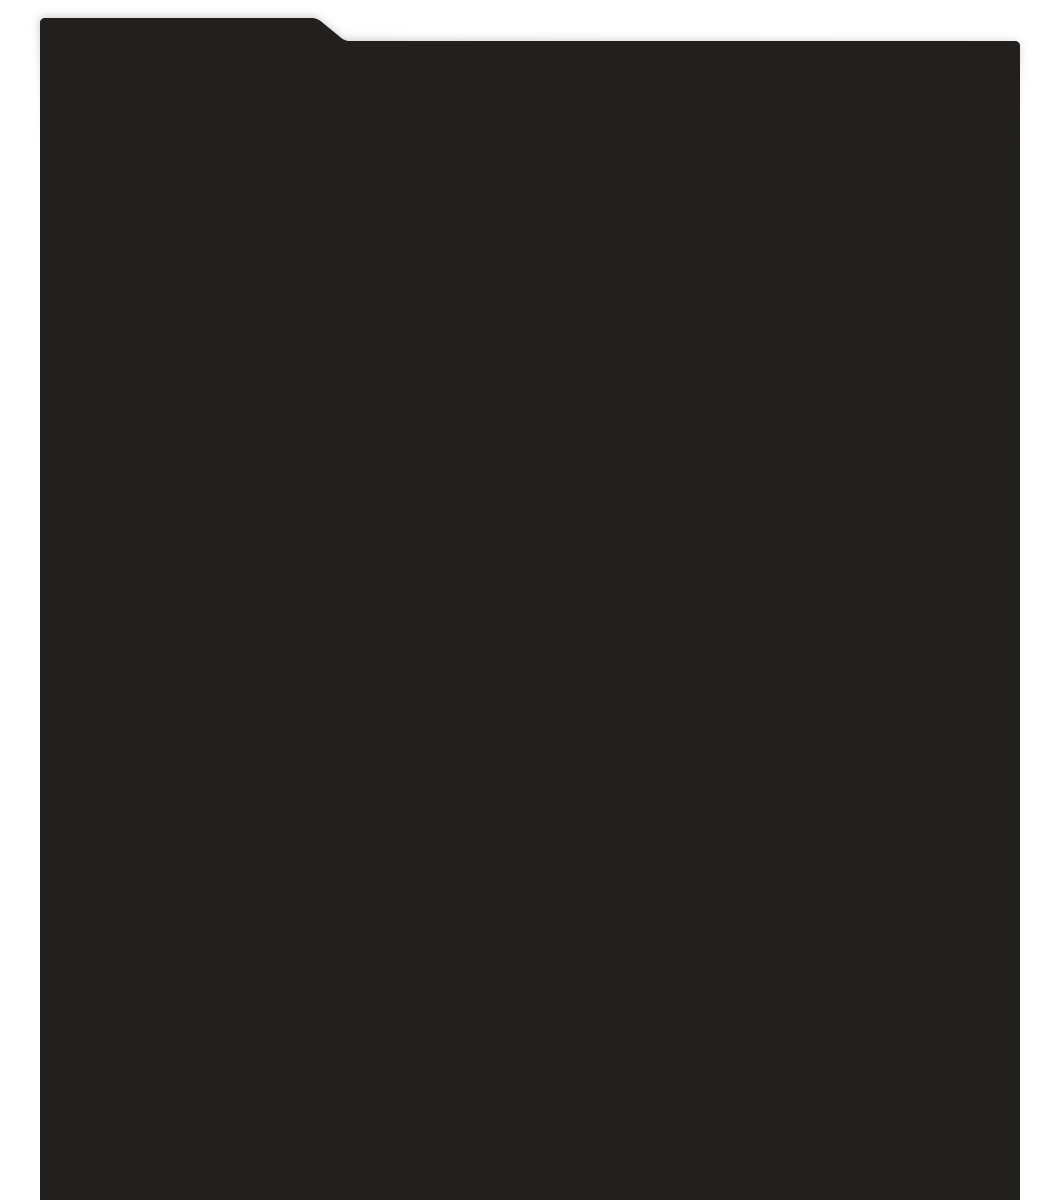
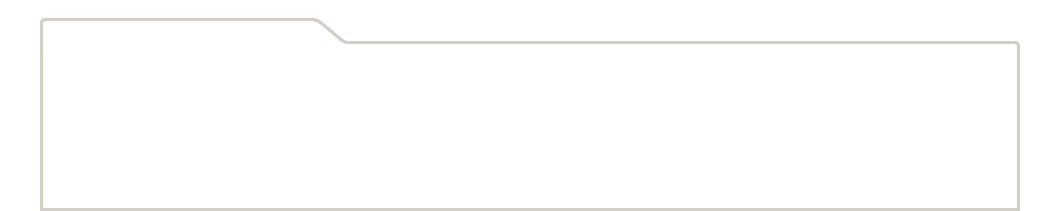
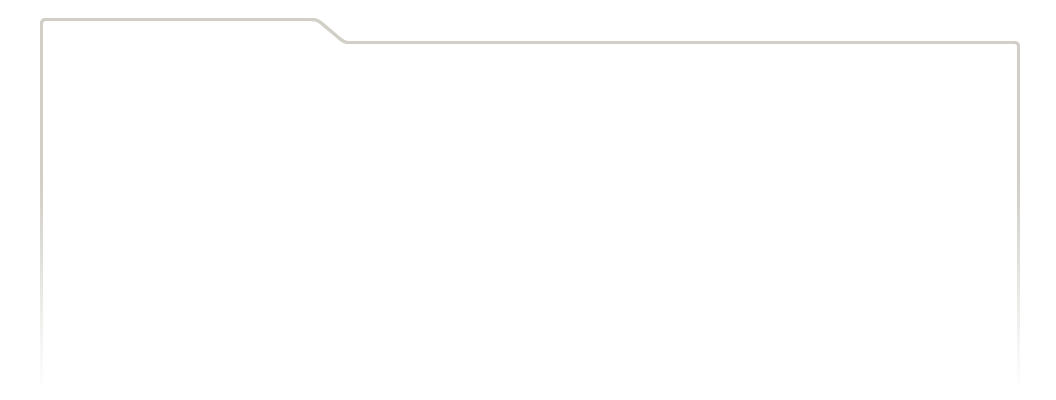
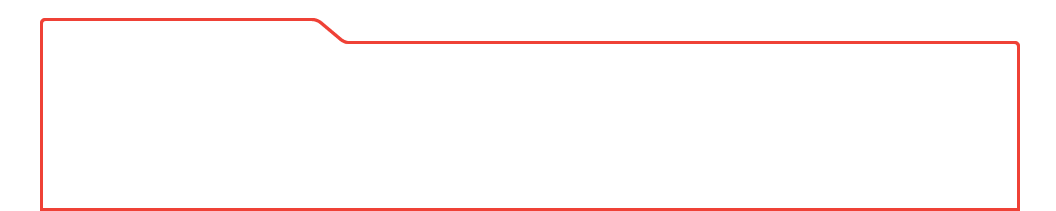
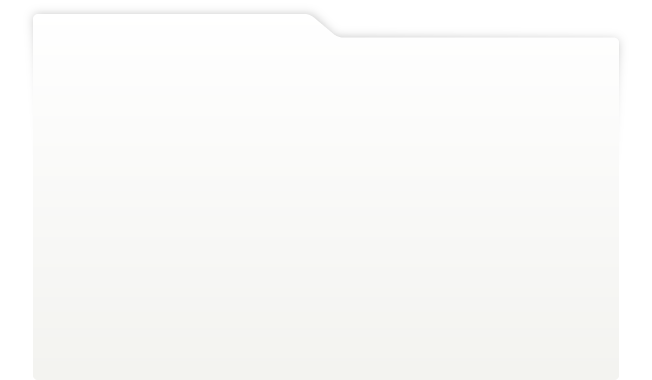
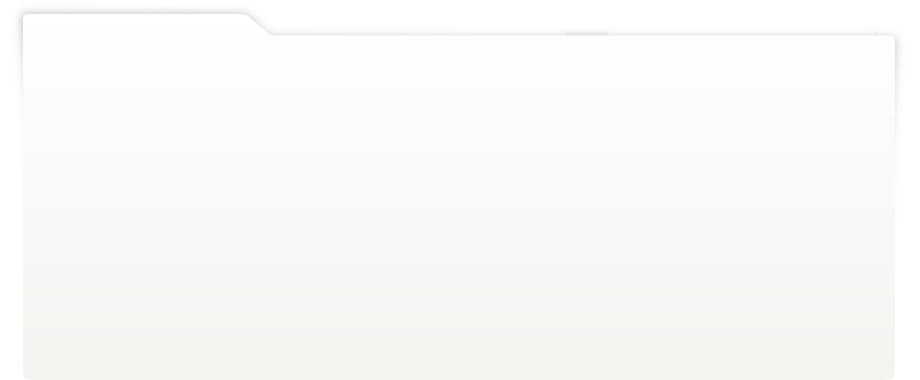
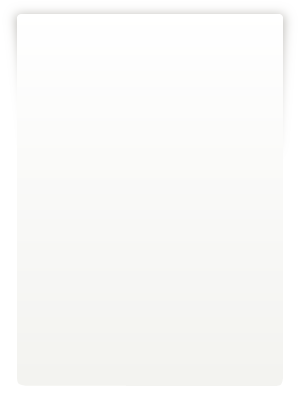
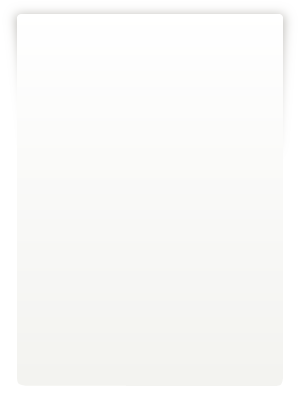
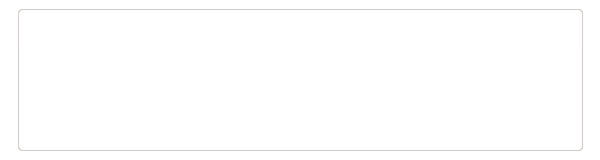
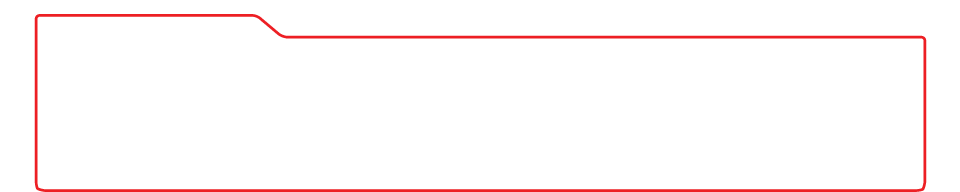
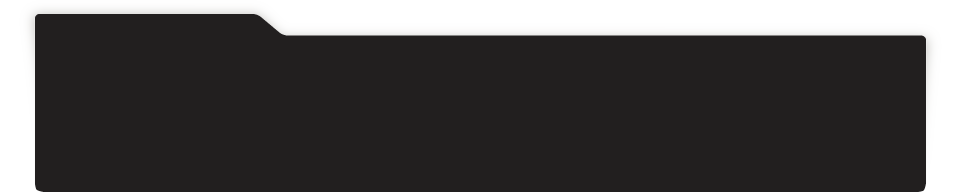
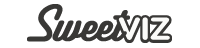
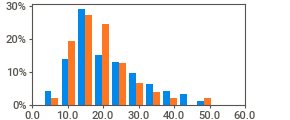
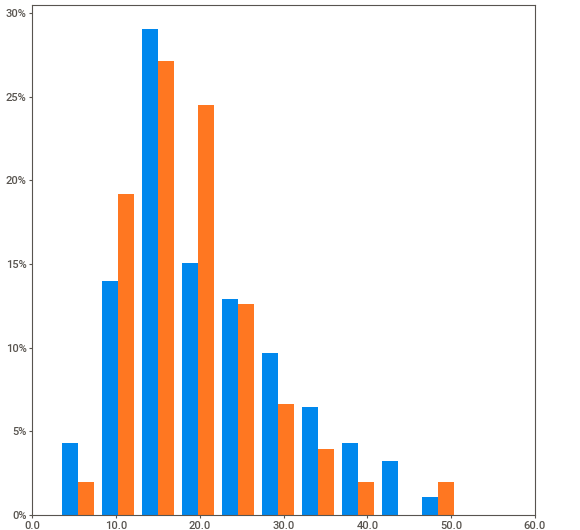
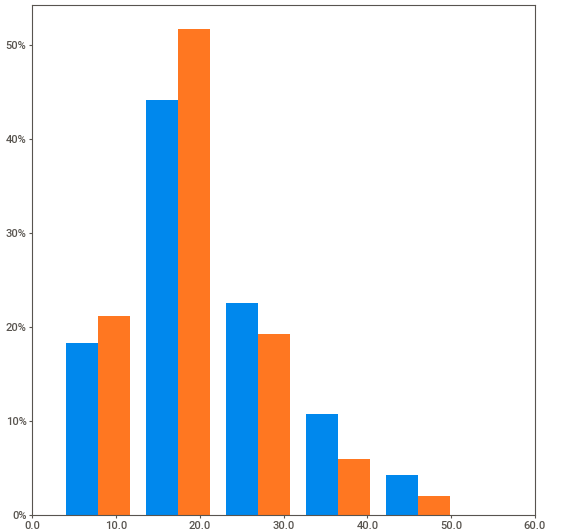
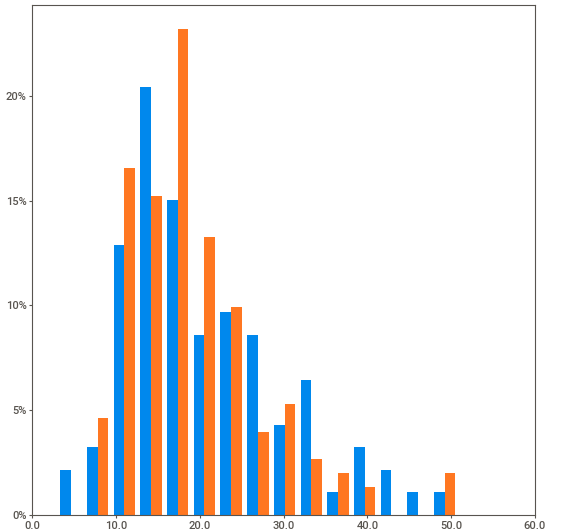
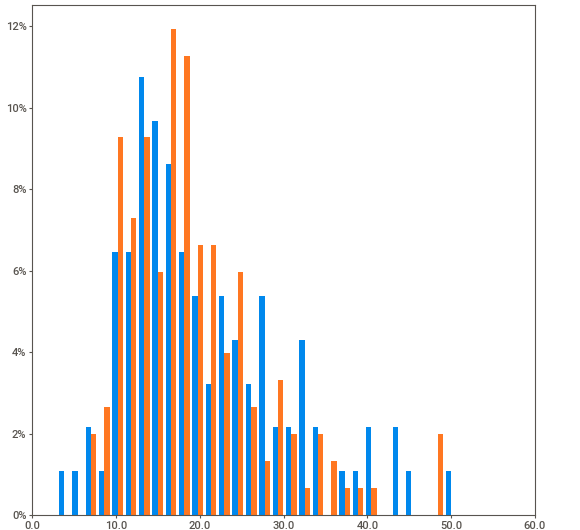
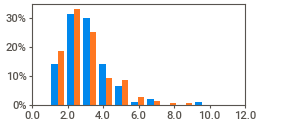
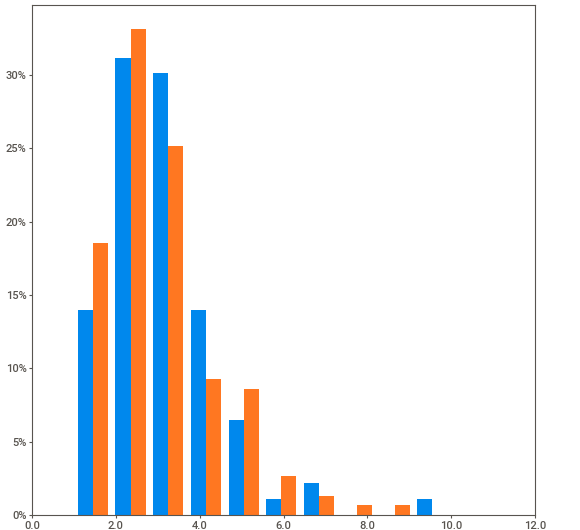
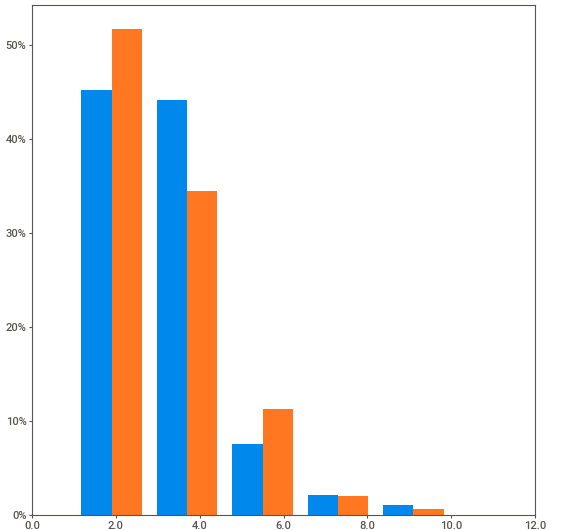
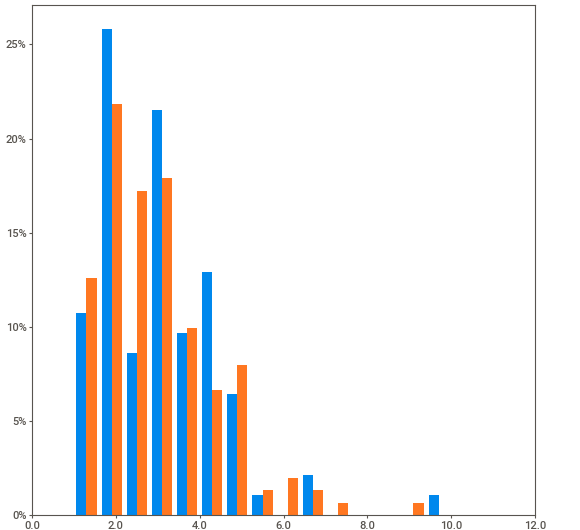
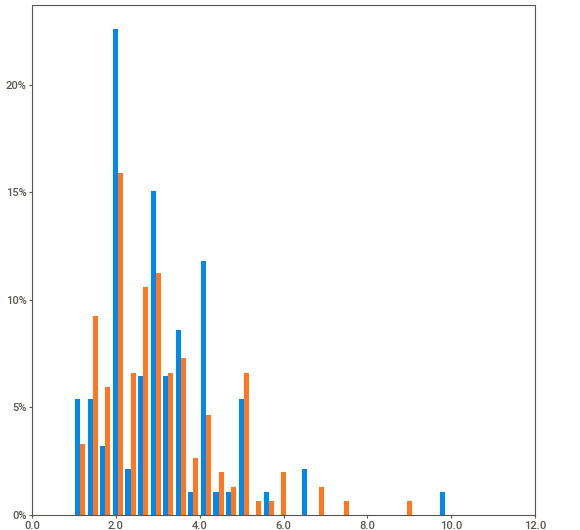
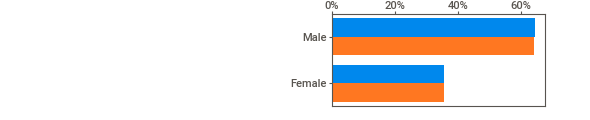
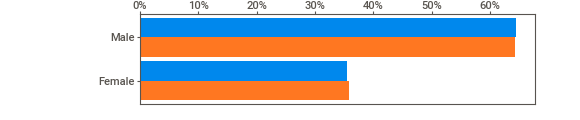
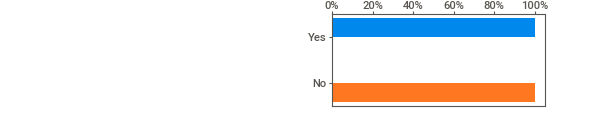
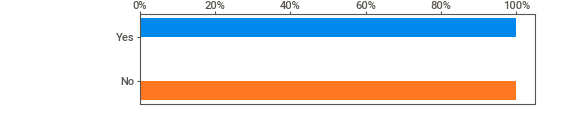
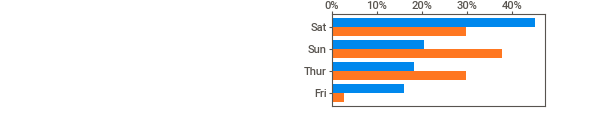
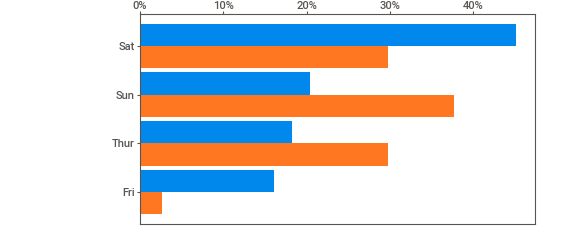
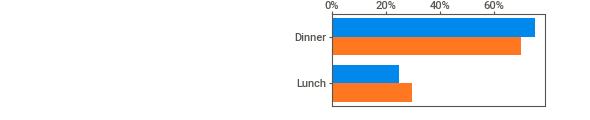
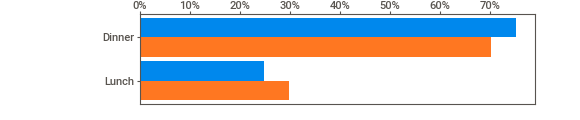
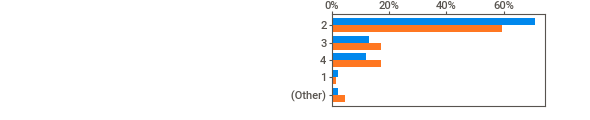
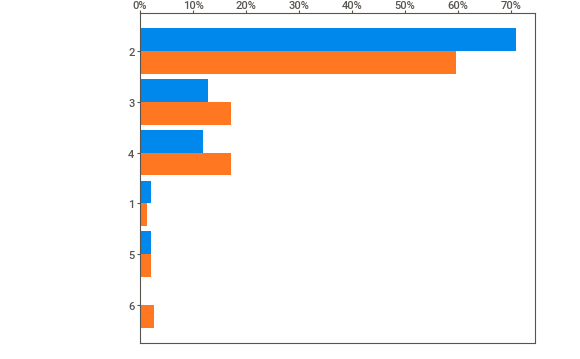
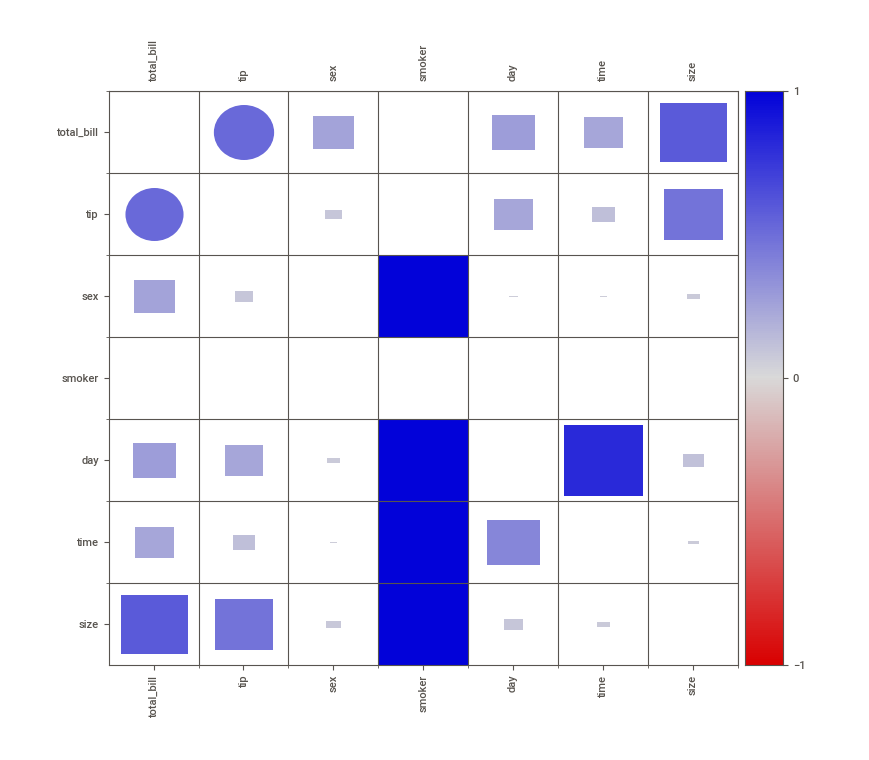
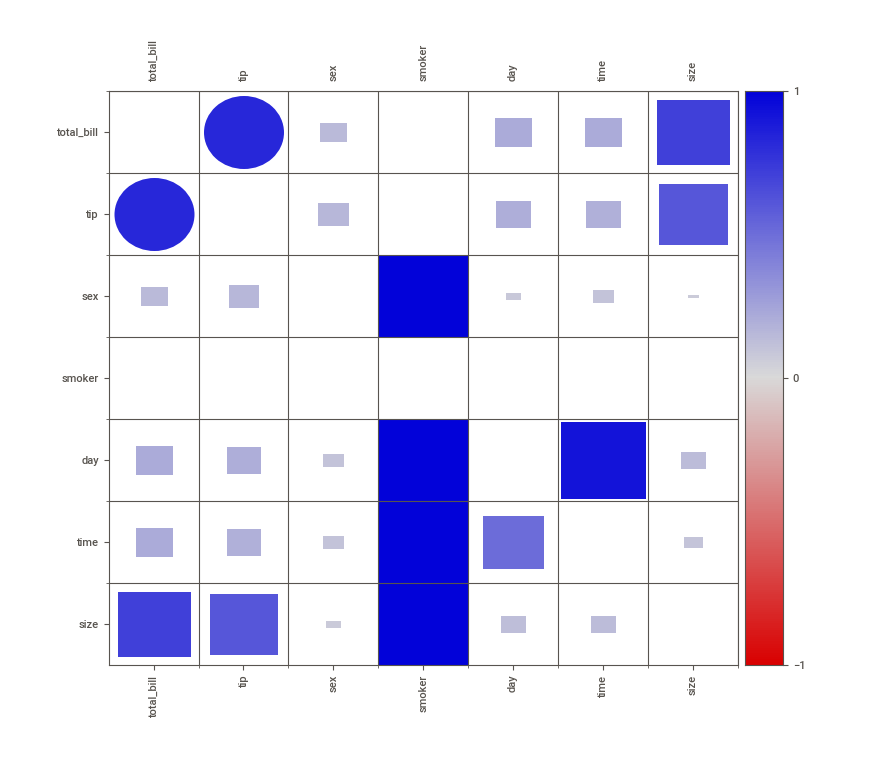

In [36]:
# Criando novo relatório comparando fumantes e não fumantes, veja que podemos atribuir os nomes das categorias
report = sv.compare_intra(gorjeta,gorjeta["smoker"] == "Yes",["Fumante","Não Fumante"])
report.show_notebook() 

Outro bom exemplo é comparar homens e mulheres.

                                             |          | [  0%]   00:00 -> (? left)


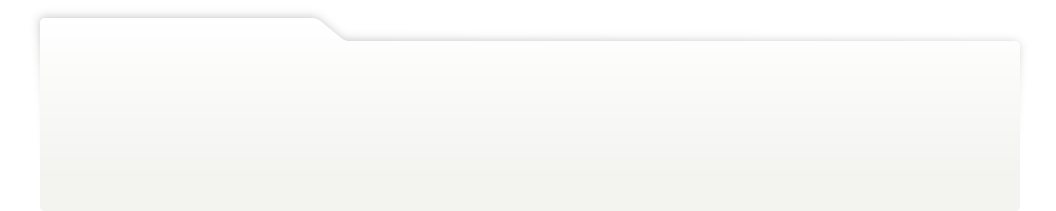
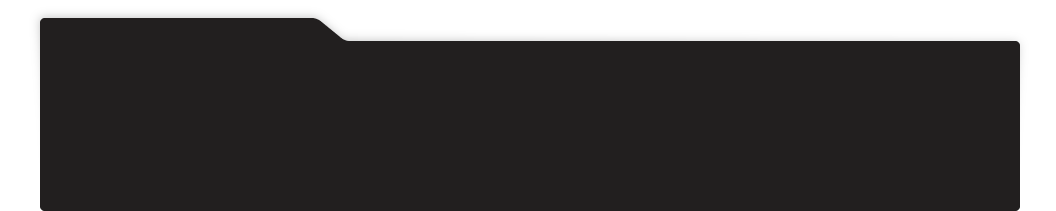
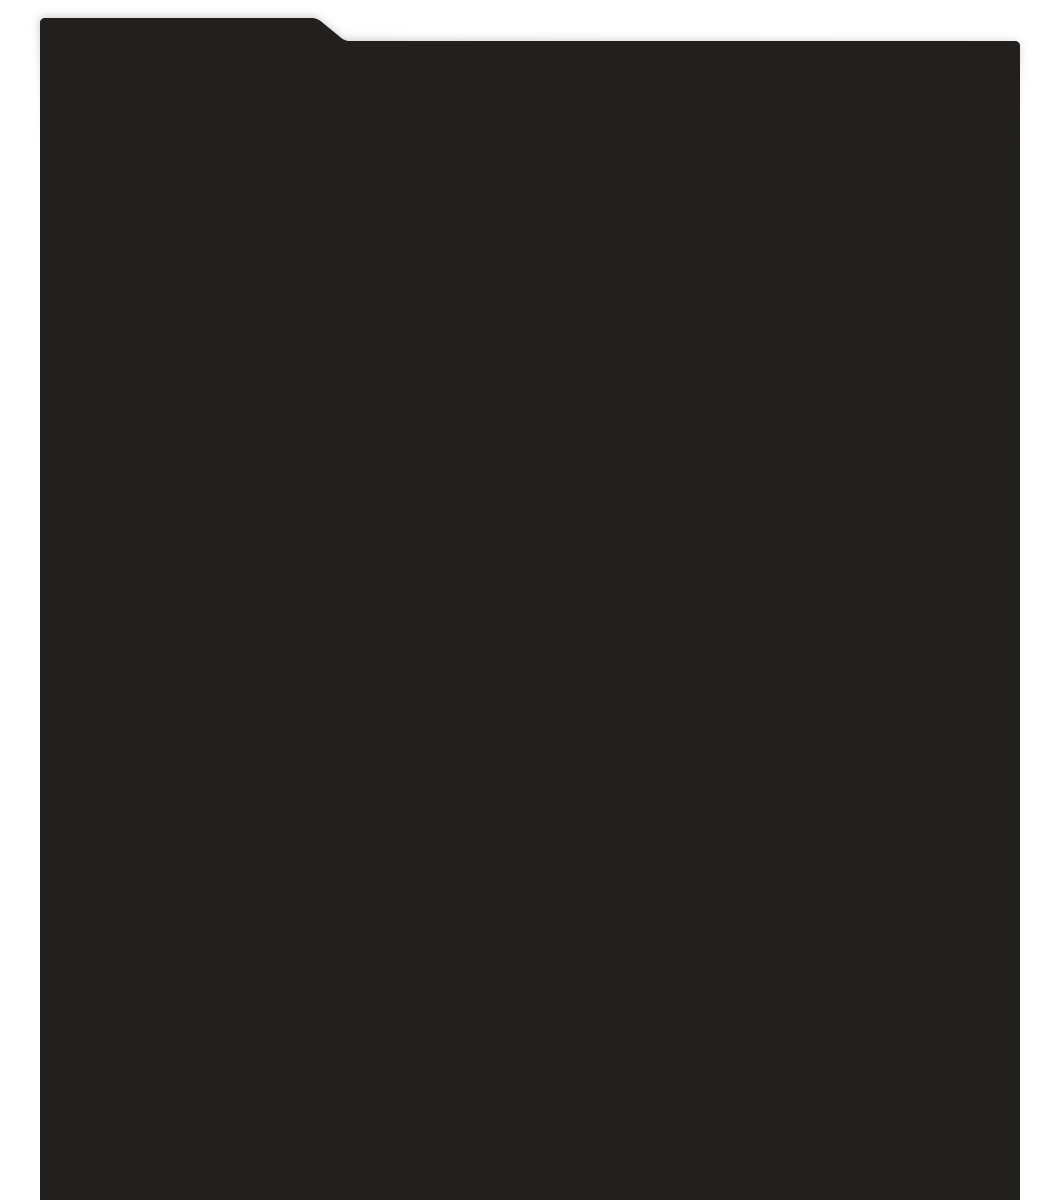
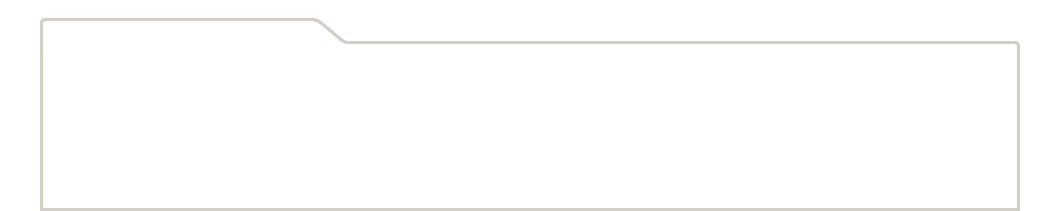
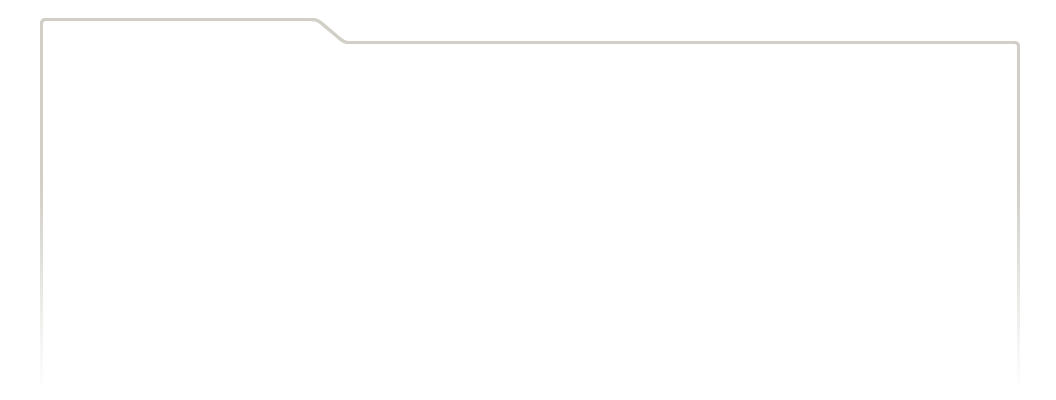
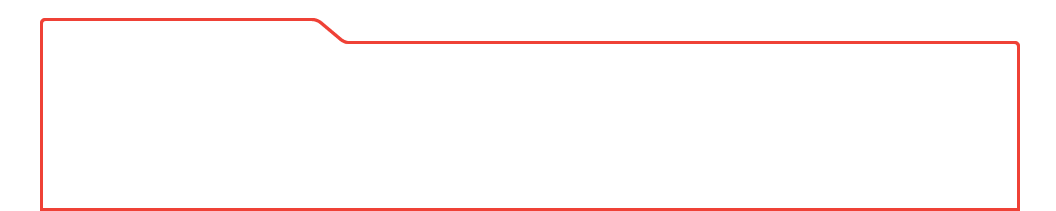
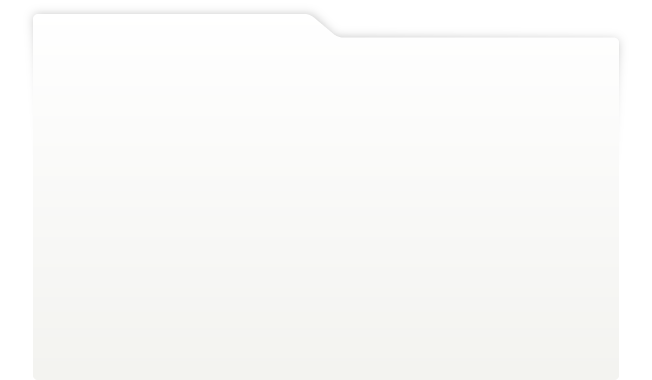
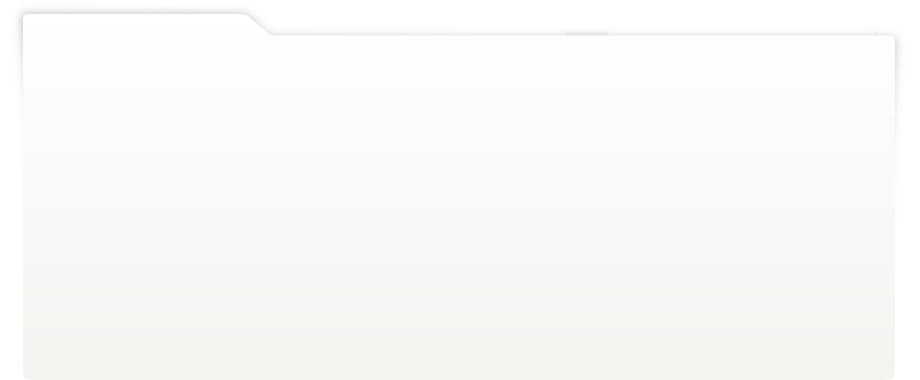
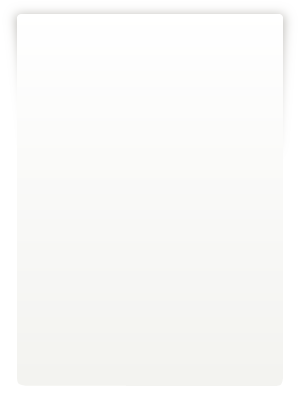
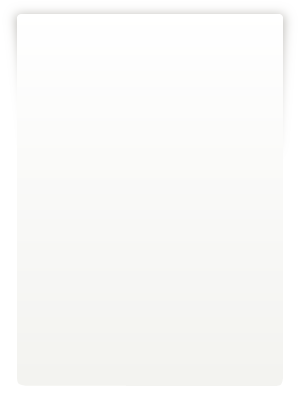
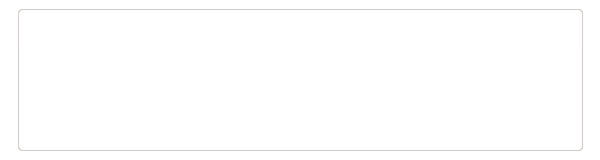
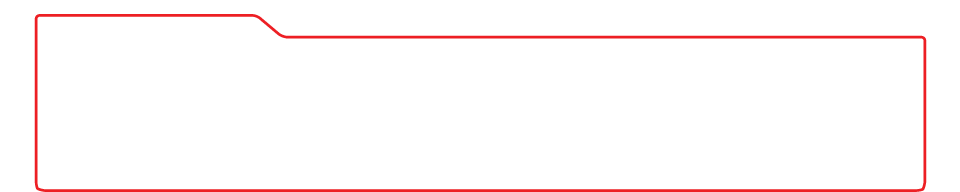
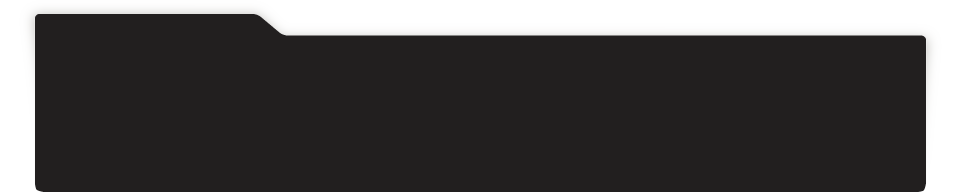
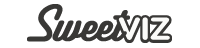
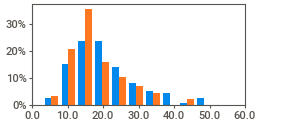
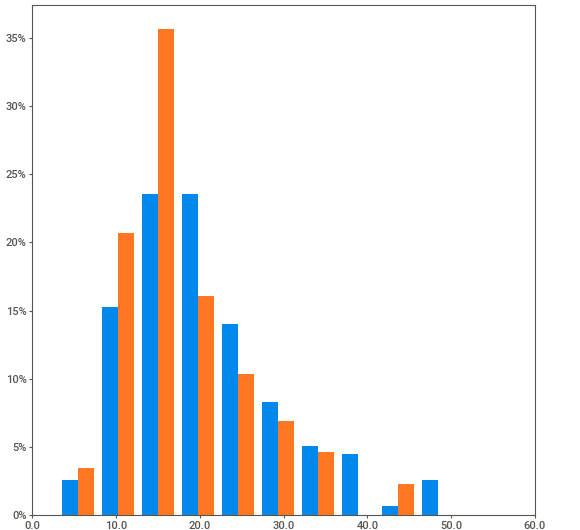
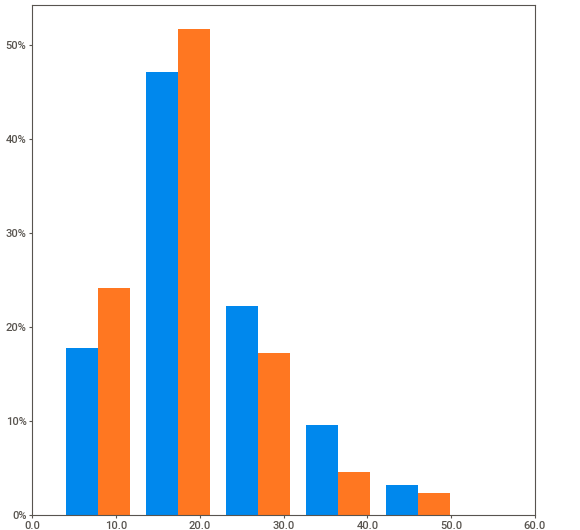
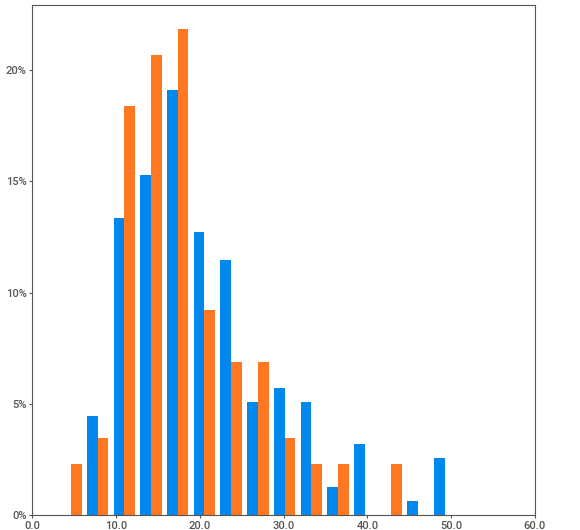
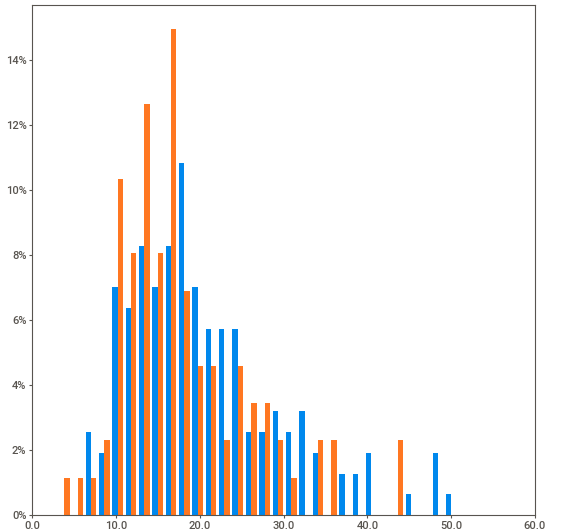
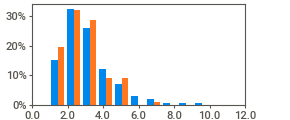
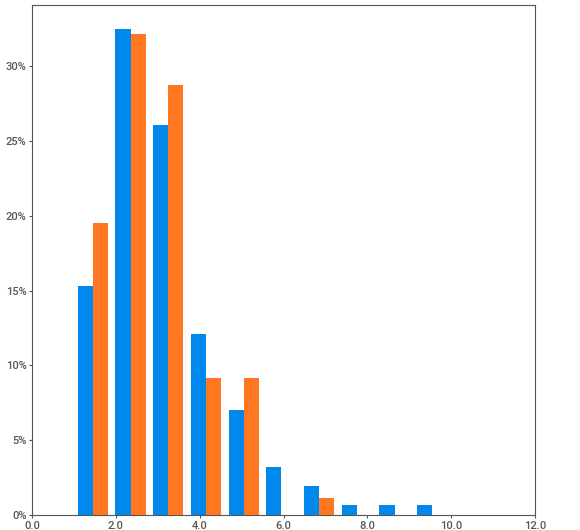
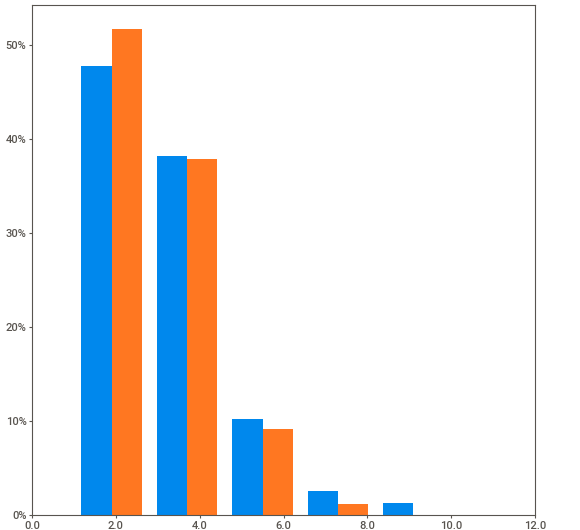
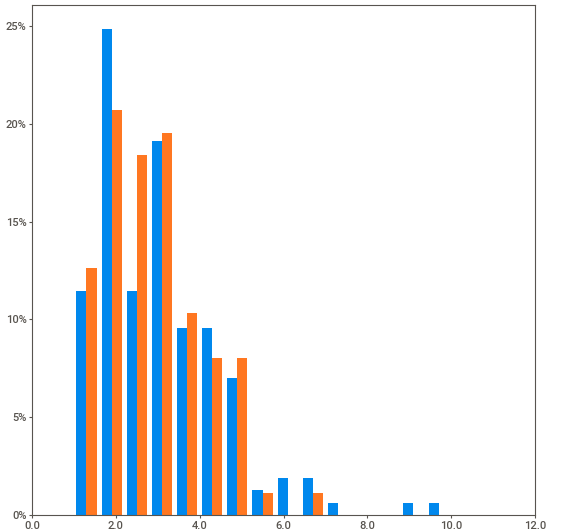
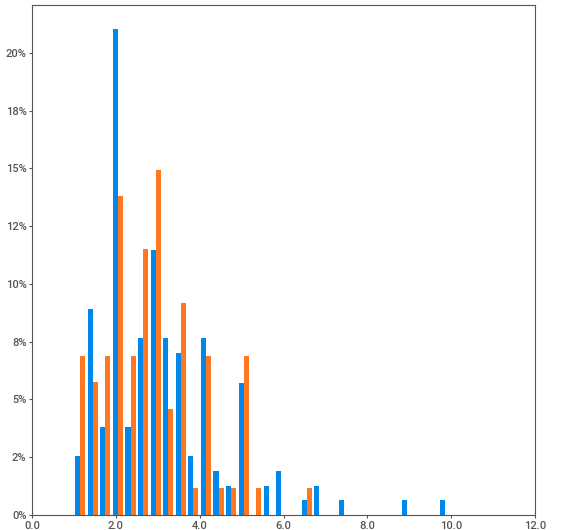
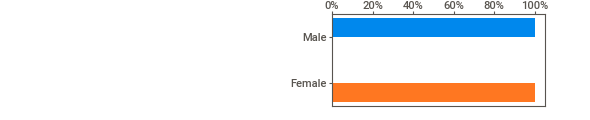
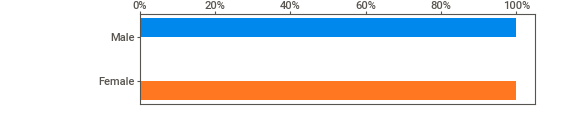
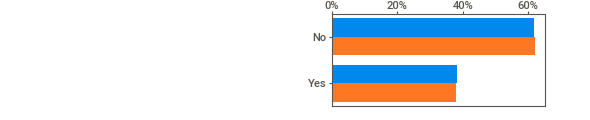
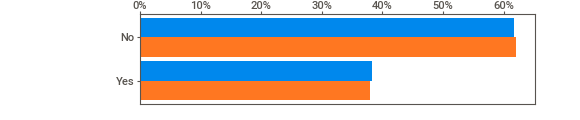
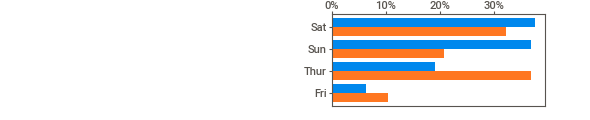
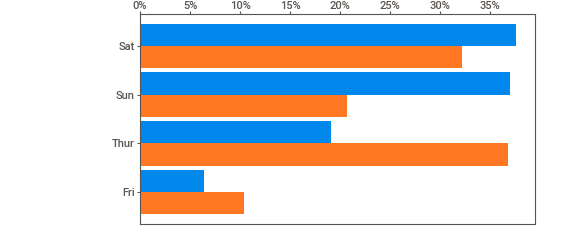
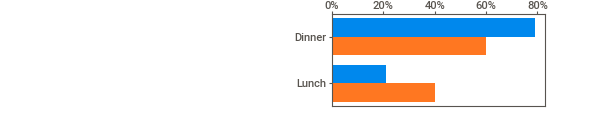
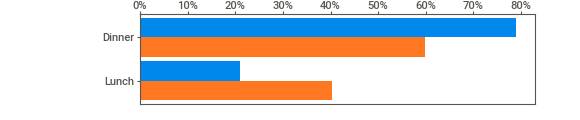
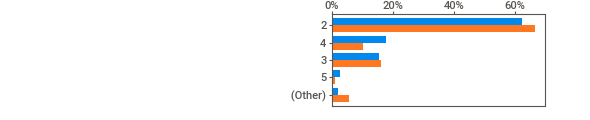
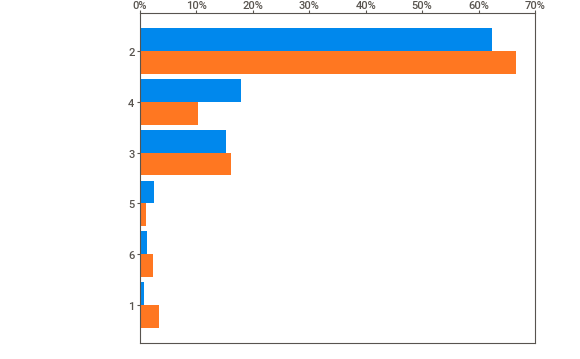
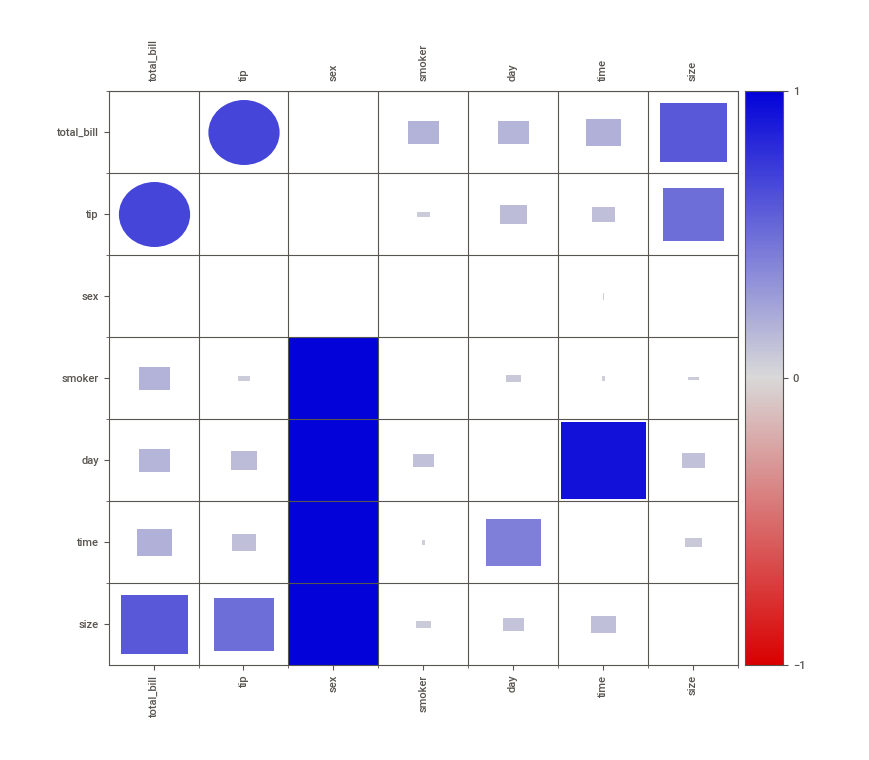
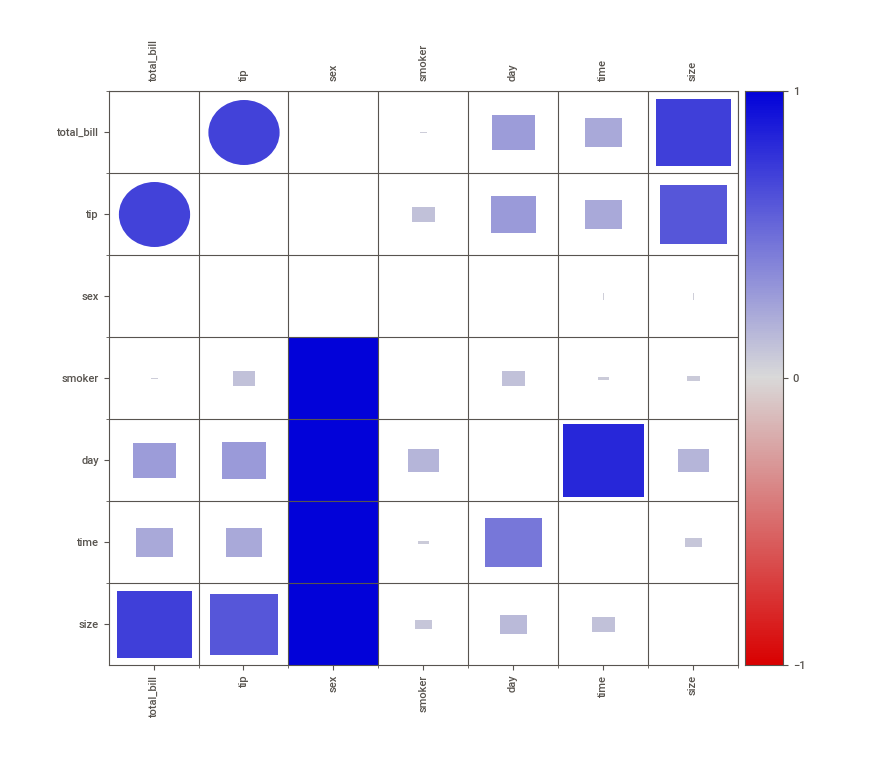

In [37]:
# Criando novo relatório comparando homens e mulheres
report = sv.compare_intra(gorjeta,gorjeta["sex"] == "Male",["Homen","Mulher"])
report.show_notebook() 